# ASSIGNMENT 7: Effects of Finite Wordlength on IIR Filters
Digital filters are normally implemented using fixed point arithmetic. In this case finite wordlength causes
inaccuracy in the operation of the filters, especially in the case of IIR filters. The biggest errors in filtering are
induced by
- Quantization noise of AD conversion
- Quantization of filter coefficients
- Overflows in additions
- Rounding of the results of multiplications

In this exercise we concentrate on the last part. The frequency response of a simple IIR filter is

$H(z)=\frac{1}{1-a z^{-1}} \quad \text{(7.1)}$

and the corresponding difference equation is

$y(n) = ay(n -1) + x(n) \quad \text{(7.2)}$

When the coefficient <i>a</i> and the previous output *y(n-1)* is represented using <i>B</i> bits (fixed point
representation), their product requires *2B-1* bits. The product must be rounded back to the length of *B* bits, in
which case the difference equation will become non-linear, namely

$\hat{y}(n)=Q[a \hat{y}(n-1)]+x(n) \quad \text{(7.3)}$

In addition to the degradation in SNR, the error due to roundoff can cause oscillation at the output of the
filter or the output to remain stuck at some non-zero value, even if the input x(n) decreased to zero.
This phenomenon is called low level limit cycles. The peak-to-peak oscillation interval is known as
deadband.
When 2’s complement form is used, the rounding is described in Python notations by
```python
rq = Q * np.floor(r/Q + 0.5)
```
where $Q = 2^{1-B}$ is the quantization step, <i>r</i> is the number to be rounded and the function *floor* rounds the value to
the nearest integer less than or equal to the value.

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dftools import lim_cycles

**Task 7.1.** Simulate the operation of the simple IIR filter mentioned above in the case of limit cycles by using the function `lim_cycles`:
```python
lim_cycles(a, A, B, N)
```
The only coefficient of the filter is a, and an impulse with an amplitude of A is used as an input to the
filter. B is the number of bits used to represent numbers and N is the number of output samples.
The function calculates and plots two outputs: output y without quantization and output yq with
quantization.

You can manipulate the plots generated by the function by using the controls at the bottom of the figure. You can also click on the plot to display the x and y values in a given point. By clicking on the fourth button from the left at the bottom of the figure, you can enable panning mode, in which the left mouse button can be used to pan the axes and the right mouse button can be used for zooming. Click on the button again to disable panning mode if you want to highlight values by clicking.

Simulate the operation of filter using lim_cycles function with values a = -0.75, A = 1, B = 4,
N = 200.

<IPython.core.display.Javascript object>


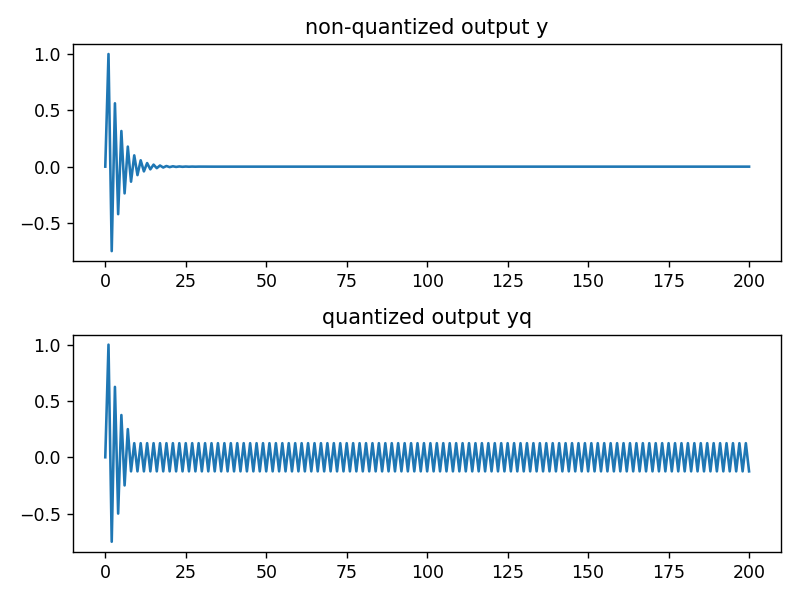

<IPython.core.display.Javascript object>


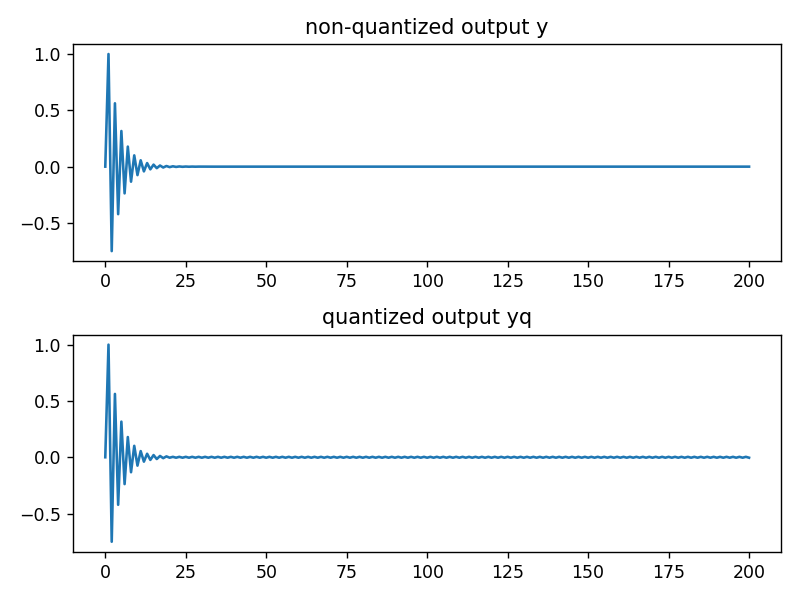

(array([ 0.00000000e+00,  1.00000000e+00, -7.50000000e-01,  5.62500000e-01,
        -4.21875000e-01,  3.16406250e-01, -2.37304688e-01,  1.77978516e-01,
        -1.33483887e-01,  1.00112915e-01, -7.50846863e-02,  5.63135147e-02,
        -4.22351360e-02,  3.16763520e-02, -2.37572640e-02,  1.78179480e-02,
        -1.33634610e-02,  1.00225958e-02, -7.51694682e-03,  5.63771011e-03,
        -4.22828259e-03,  3.17121194e-03, -2.37840895e-03,  1.78380672e-03,
        -1.33785504e-03,  1.00339128e-03, -7.52543458e-04,  5.64407594e-04,
        -4.23305695e-04,  3.17479271e-04, -2.38109454e-04,  1.78582090e-04,
        -1.33936568e-04,  1.00452426e-04, -7.53393193e-05,  5.65044895e-05,
        -4.23783671e-05,  3.17837753e-05, -2.38378315e-05,  1.78783736e-05,
        -1.34087802e-05,  1.00565852e-05, -7.54243887e-06,  5.65682915e-06,
        -4.24262187e-06,  3.18196640e-06, -2.38647480e-06,  1.78985610e-06,
        -1.34239207e-06,  1.00679406e-06, -7.55095542e-07,  5.66321656e-07,
        -4.2

In [2]:
# run a magic command that enables interactive plots
%matplotlib notebook

# simulate the operation of the filter using lim_cycles
# call the function as many times as you need to answer the questions below
a = -0.75
A = 1
B = 4
N = 200

lim_cycles(a, A, B, N) # given values

# testbench for different B values
B = 9
lim_cycles(a, A, B, N)


**What is the difference between filter outputs in the non-quantized and quantized case?**

The non-quantized output converges to values close to 0 over time, where as the quantized output shows the low level limit cycle behavior described before, where the output values ring around the deadband value.

**What is the deadband value for the quantized output?** (Look at the figure)

abs(0.125-(-0.125)) = 0.25

**How many bits is the shortest wordlength required for the deadband value to be lower than 0.01?** (Look at
the output with different B values; zoom in)

9 bits gives the deadband value abs(0.004-(-0.004)) = 0.008

**Task 7.2.** Think about everything you have experienced thus far (or look at the course material) and
answer: **What are the overall advantages and disadvantages of IIR filters compared to FIR filters?** (At
least three things)

1. IIR filters have steeper transition bands than FIR filters for applications that need a steep transition band
2. IIR filters introduce phase distortion, particularly in the passband, which can be problematic in applications requiring linear phase response, such as audio signal processing
3. IIR filters have feedback loops, allowing them to have feedback from previous outputs, which can lead to more compact filter designs and easier implementation of certain filter characteristics

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment7_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.